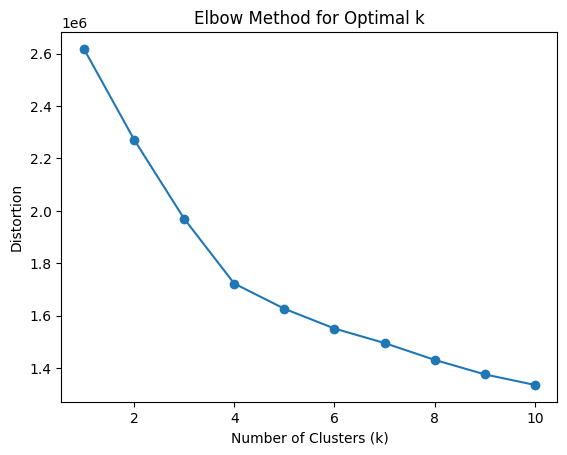

Cluster Centers:
[[-0.48736777 -0.45514038 -0.02507564 -0.66825234 -0.78165466 -0.57648467
  -0.41838458 -0.63136492 -0.12317382 -0.1713902  -2.91066194 -2.9183902
  -0.52125061 -0.57868086 -0.5145925  -0.56016432 -0.03745968 -0.03660449]
 [ 0.78708979  0.97920933 -0.22761074  0.76834784  0.63955305  0.26173828
   0.24766127  0.27687155 -0.64188752 -0.54348596  0.32669046  0.32467826
  -0.06948634 -0.05019117  0.93434695  0.92262362 -0.38898885 -0.30453014]
 [ 0.11870788 -0.46962584  0.71260818 -0.1465292  -0.29550424  0.45594907
   0.45381796  0.41608284  0.61235413  0.88905994  0.32008119  0.32596438
   0.8457421   0.86179055 -0.17648648 -0.45000558  1.11152988  0.99995945]
 [-0.59859433 -0.43004762 -0.21233965 -0.3791154  -0.15253428 -0.32438173
  -0.35525231 -0.29886569  0.22326196 -0.00644357  0.34892418  0.34937723
  -0.28489455 -0.29450134 -0.54496225 -0.3642973  -0.30294789 -0.31013778]]


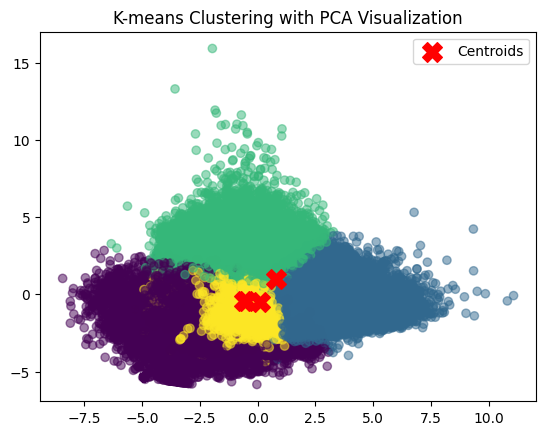

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from sklearn.metrics import silhouette_score

def k_means_clustering(X, k, max_iters=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels

def elbow_method(X, max_clusters=10):
    distortions = []
    
    for k in range(1, max_clusters + 1):
        centroids, labels = k_means_clustering(X, k)
        distortion = np.sum((X - centroids[labels]) ** 2)
        distortions.append(distortion)
    
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.show()

def pseudo_accuracy(labels, true_labels):
        correct_assignments = np.sum(labels == true_labels)
        total_points = len(true_labels)
        accuracy = correct_assignments / total_points
        return accuracy

data = pd.read_csv('weatherAUS.csv')
data = data.fillna(0)
data = data.replace({'Yes':1, 'No':0})
drop_columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
data = data.drop(columns=drop_columns)


data = (data - data.mean()) / data.std()
X = data.values

elbow_method(X)

k = 4
centroids, labels = k_means_clustering(X, k)
# true_labels = np.random.randint(0, k, len(X))
# accuracy = silhouette_score(X,labels)
# print("Accuracy: ", accuracy)
print("Cluster Centers:")
print(centroids)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering with PCA Visualization')
plt.legend()
plt.show()
